In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import KBinsDiscretizer

## Loading CSV data

In [333]:
credit = pd.read_csv('../../data/task2/default of credit card clients.csv', header =1)

# Basic information about the data

In [334]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [335]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [336]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [337]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# Correlation Analysis

In [338]:
corrMat = credit.corr()
print(corrMat)

                                  ID  LIMIT_BAL       SEX  EDUCATION  \
ID                          1.000000   0.026179  0.018497   0.039177   
LIMIT_BAL                   0.026179   1.000000  0.024755  -0.219161   
SEX                         0.018497   0.024755  1.000000   0.014232   
EDUCATION                   0.039177  -0.219161  0.014232   1.000000   
MARRIAGE                   -0.029079  -0.108139 -0.031389  -0.143464   
AGE                         0.018678   0.144713 -0.090874   0.175061   
PAY_0                      -0.030575  -0.271214 -0.057643   0.105364   
PAY_2                      -0.011215  -0.296382 -0.070771   0.121566   
PAY_3                      -0.018494  -0.286123 -0.066096   0.114025   
PAY_4                      -0.002735  -0.267460 -0.060173   0.108793   
PAY_5                      -0.022199  -0.249411 -0.055064   0.097520   
PAY_6                      -0.020270  -0.235195 -0.044008   0.082316   
BILL_AMT1                   0.019389   0.285430 -0.033642   0.02

In [339]:
corrDefaultPayment = corrMat["default payment next month"]
corrDefaultPayment.sort_values()


LIMIT_BAL                    -0.153520
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT4                     -0.056827
PAY_AMT3                     -0.056250
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
SEX                          -0.039961
MARRIAGE                     -0.024339
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
ID                           -0.013952
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
AGE                           0.013890
EDUCATION                     0.028006
PAY_6                         0.186866
PAY_5                         0.204149
PAY_4                         0.216614
PAY_3                         0.235253
PAY_2                         0.263551
PAY_0                         0.324794
default payment next month    1.000000
Name: default payment nex

# Finding from Correlation Analysis

The most significant attributes are 

PAY_0                         0.324794

PAY_2                         0.263551

PAY_3                         0.235253

PAY_4                         0.216614

PAY_5                         0.204149

PAY_6                         0.186866

LIMIT_BAL                    -0.153520

# Data discretization for AGE 

In [340]:
bins = [20, 28, 34, 42, 99999]
labels = ['20-27', '28-33', '34-41','42 or older']
credit['AGE'] = pd.cut(credit['AGE'], bins=bins, labels=labels)

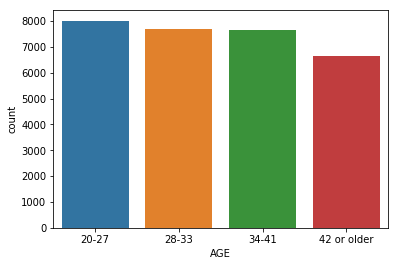

In [341]:
sns.countplot(x='AGE',data=credit)

In [342]:
credit['SEX'] = credit['SEX'].astype('category')
credit['EDUCATION'] = credit['EDUCATION'].astype('category')
credit['MARRIAGE'] = credit['MARRIAGE'].astype('category')
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null category
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6   

In [343]:
credit.describe()

,ID,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [344]:
credit.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.0,30000.0,30000.0,30000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,2.0,7.0,4.0,4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2.0,2.0,2.0,20-27,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18112.0,14030.0,15964.0,8013,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167484.322667,NaN,NaN,NaN,NaN,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,NaN,NaN,NaN,NaN,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,NaN,NaN,NaN,NaN,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


In [345]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,20-27,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,20-27,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,28-33,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,34-41,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,42 or older,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [346]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [347]:
#the number of males and females
credit.groupby('SEX')['SEX'].count()

SEX
1    11888
2    18112
Name: SEX, dtype: int64

In [348]:
credit.groupby('EDUCATION')['EDUCATION'].count()

EDUCATION
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

In [349]:
credit.groupby('MARRIAGE')['MARRIAGE'].count()

MARRIAGE
0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

In [350]:
credit.groupby('AGE')['AGE'].count()

AGE
20-27          8013
28-33          7683
34-41          7648
42 or older    6656
Name: AGE, dtype: int64

In [351]:
not_default_payment_next_month  = credit[credit['default payment next month']==0]
len(not_default_payment_next_month)

23364

In [352]:
default_payment_next_month  = credit[credit['default payment next month']==1]
len(default_payment_next_month)

6636

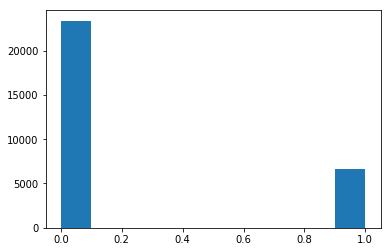

In [353]:
plt.hist(credit['default payment next month'])
plt.show()

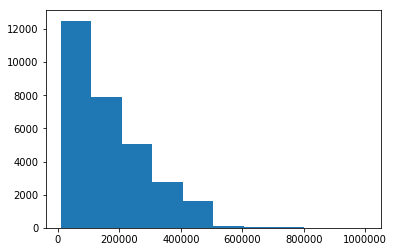

In [354]:
plt.hist(credit['LIMIT_BAL'])
plt.show()

(array([2.3283e+04, 6.5110e+03, 2.0000e+02, 6.0000e+00]),
 array([  10000.,  257500.,  505000.,  752500., 1000000.]),
 <a list of 4 Patch objects>)

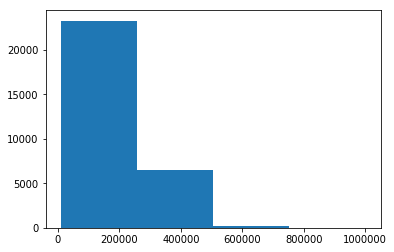

In [355]:
plt.hist(credit['LIMIT_BAL'], bins=4)

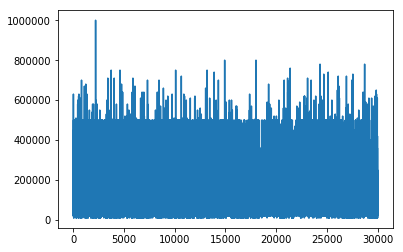

In [356]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

C:\Users\Cindy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


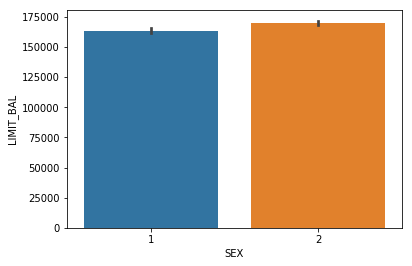

In [357]:
#plt.hist(credit['AGE'], bins=4)
sns.barplot(x='SEX',y='LIMIT_BAL',data=credit)
#sns.countplot(x='SEX',data=credit)

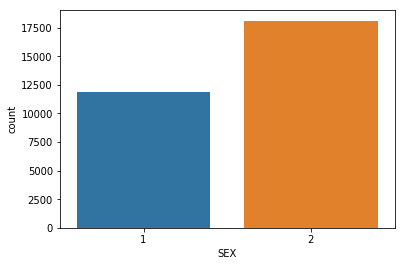

In [358]:
#plot the number of males and females
sns.countplot(x='SEX',data=credit)

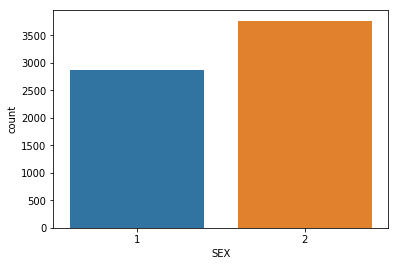

In [359]:
#plot the number of males and females who default payment next month
sns.countplot(x='SEX',data=default_payment_next_month)

In [360]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null category
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null category
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6   

## Age and Sex Factor

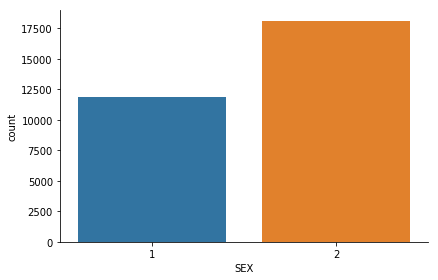

In [361]:
sns.factorplot('SEX', data=credit, kind='count', aspect=1.5)

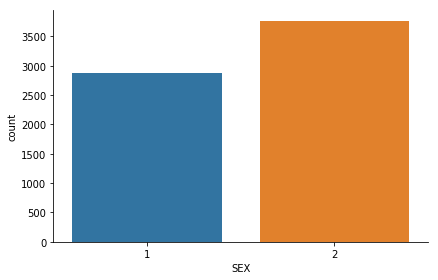

In [362]:
sns.factorplot('SEX', data=default_payment_next_month, kind='count', aspect=1.5)

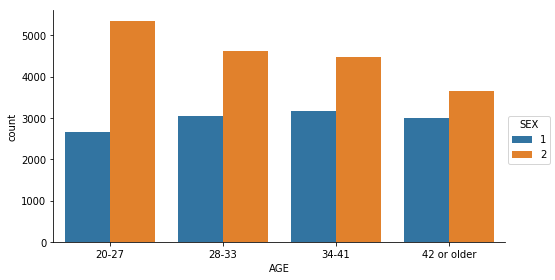

In [363]:
g = sns.factorplot('AGE', data=credit, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('AGE')

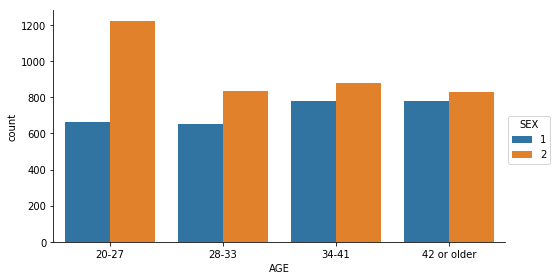

In [364]:
g = sns.factorplot('AGE', data=default_payment_next_month, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('AGE')


From the figure above, the ratio of defaut payment are hiher for female (SEX =2 ) in groups age 20-27 and age 42orabove

# EDUCATION and SEX factor

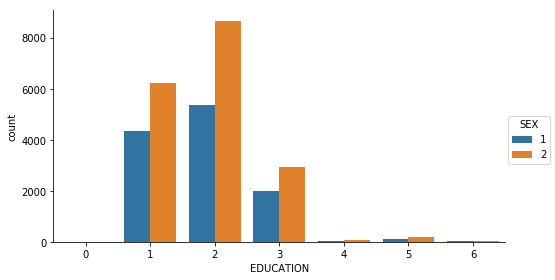

In [365]:
g = sns.factorplot('EDUCATION', data=credit, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('EDUCATION')

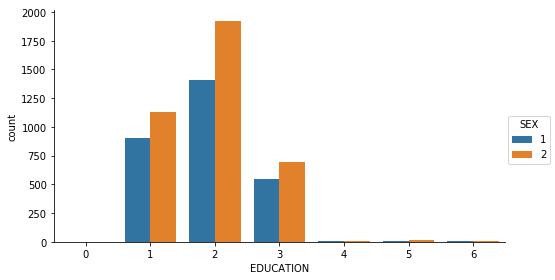

In [366]:
g = sns.factorplot('EDUCATION', data=default_payment_next_month, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('EDUCATION')

From the figure above, the number of defaut payment are hihest for both male and female with university EDUCATION(=2)

# MARRIAGE and SEX factors

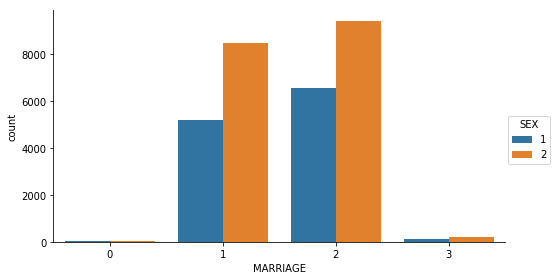

In [367]:
g = sns.factorplot('MARRIAGE', data=credit, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('MARRIAGE')

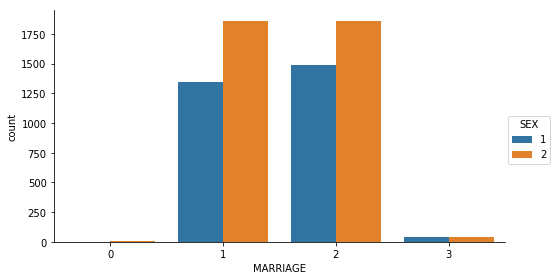

In [368]:
g = sns.factorplot('MARRIAGE', data=default_payment_next_month, hue='SEX', kind='count', aspect=1.75)
g.set_xlabels('MARRIAGE')

From the figure above, the number of defaut payment are hihest for married female

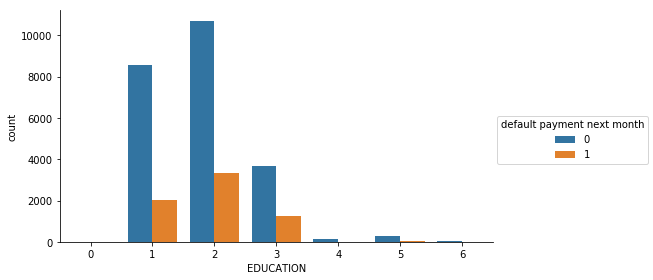

In [369]:
g = sns.factorplot('EDUCATION', data=credit, hue='default payment next month', kind='count', aspect=1.75)
g.set_xlabels('EDUCATION')

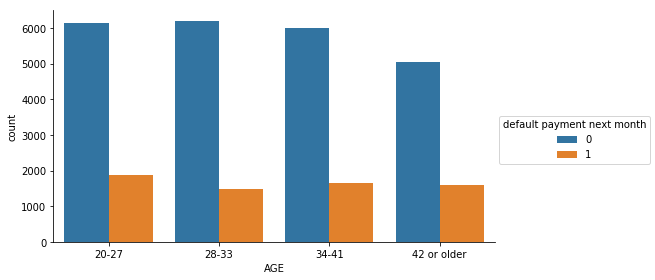

In [370]:
g = sns.factorplot('AGE', data=credit, hue='default payment next month', kind='count', aspect=1.75)
g.set_xlabels('AGE')

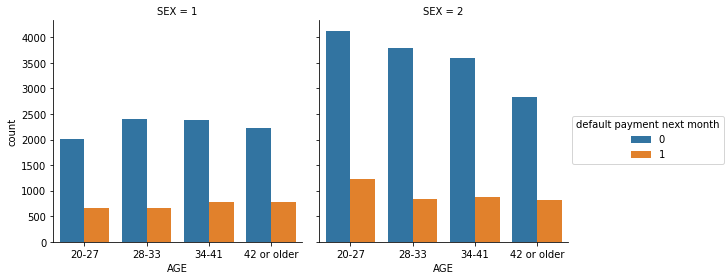

In [371]:
#g=sns.factorplot('AGE', data=credit, kind='count', hue='default payment next month', col='SEX', hue_order=range(0,2),
#                 palette='Blues')
g=sns.factorplot('AGE', data=credit, kind='count', hue='default payment next month', col='SEX', hue_order=range(0,2))
g.set_xlabels('AGE')

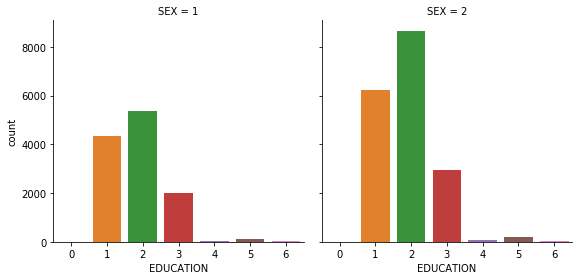

In [372]:
g=sns.factorplot('EDUCATION', data=credit, kind='count', col='SEX', hue_order=range(0,2))
g.set_xlabels('EDUCATION')

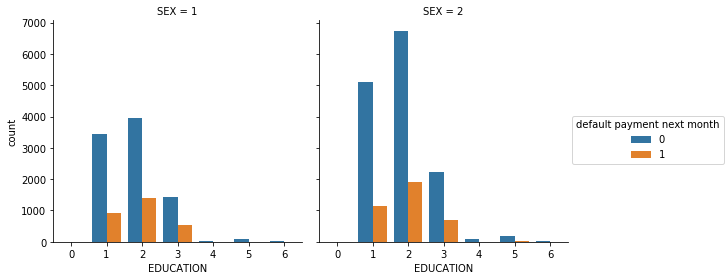

In [373]:
g=sns.factorplot('EDUCATION', data=credit, kind='count', hue='default payment next month', col='SEX', hue_order=range(0,2))
g.set_xlabels('EDUCATION')

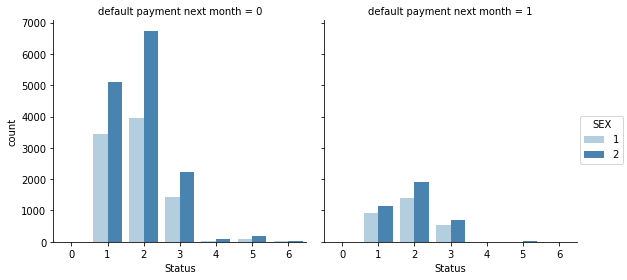

In [374]:
g=sns.factorplot('EDUCATION', data=credit, kind='count', col='default payment next month', hue='SEX', hue_order=range(1,3),
                 palette='Blues')
g.set_xlabels('Status')

# History of past payment factor

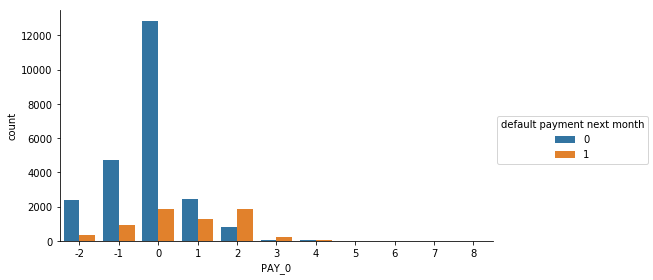

In [375]:
g = sns.factorplot('PAY_0', data=credit, hue='default payment next month', kind='count', aspect=1.75)
g.set_xlabels('PAY_0')

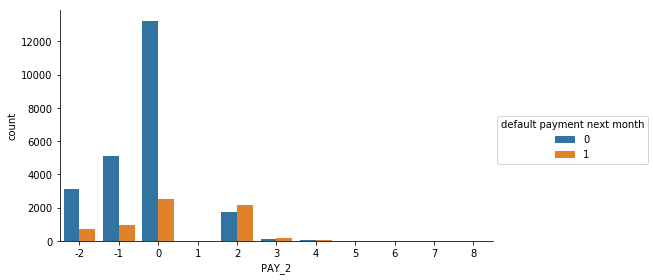

In [376]:
g = sns.factorplot('PAY_2', data=credit, hue='default payment next month', kind='count', aspect=1.75)
g.set_xlabels('PAY_2')

From the figure above, the ratio of defaut payment are hiher for those with payment delay for two months and above

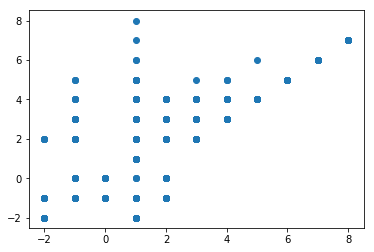

In [377]:
x = credit['PAY_0']
y = credit['PAY_2']
plt.scatter(x,y)
plt.show()

In [378]:
header = credit.dtypes.index
print(header)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


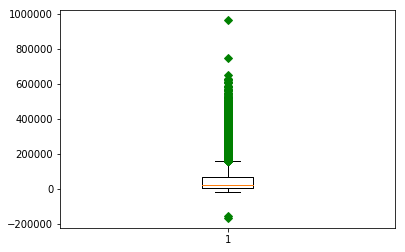

In [379]:
A = credit['BILL_AMT1']
plt.boxplot(A,0,'gD')
plt.show()

In [380]:
covMat = credit.cov()
print(covMat)

                                      ID     LIMIT_BAL         PAY_0  \
ID                          7.500250e+07  2.941664e+07   -297.572636   
LIMIT_BAL                   2.941664e+07  1.683446e+10 -39545.930009   
PAY_0                      -2.975726e+02 -3.954593e+04      1.262930   
PAY_2                      -1.162770e+02 -4.603765e+04      0.904330   
PAY_3                      -1.916922e+02 -4.443225e+04      0.772384   
PAY_4                      -2.769132e+01 -4.057181e+04      0.707972   
PAY_5                      -2.178600e+02 -3.667056e+04      0.648743   
PAY_6                      -2.018774e+02 -3.509308e+04      0.613292   
BILL_AMT1                   1.236447e+07  2.727020e+09  15480.304170   
BILL_AMT2                   1.108392e+07  2.570130e+09  15185.916919   
BILL_AMT3                   1.462688e+07  2.548533e+09  14011.556537   
BILL_AMT4                   2.248126e+07  2.453926e+09  12950.248389   
BILL_AMT5                   8.795803e+06  2.331481e+09  12341.66

In [381]:
credit_onehot = credit.copy()
credit_onehot = pd.get_dummies(credit_onehot, columns=['SEX'], prefix = ['SEX'])

In [382]:
credit_onehot.head()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_1,SEX_2
0,1,20000,2,1,20-27,2,2,-1,-1,-2,...,0,0,689,0,0,0,0,1,0,1
1,2,120000,2,2,20-27,-1,2,0,0,0,...,3261,0,1000,1000,1000,0,2000,1,0,1
2,3,90000,2,2,28-33,0,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,1
3,4,50000,2,1,34-41,0,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,1
4,5,50000,2,1,42 or older,-1,0,-1,0,0,...,19131,2000,36681,10000,9000,689,679,0,1,0


# Summary of your findings

1) Finding from Correlation Analysis, the most significant attributes are

&emsp; PAY_0 0.324794  
&emsp; PAY_2 0.263551  
&emsp; PAY_3 0.235253  
&emsp; PAY_4 0.216614  
&emsp; PAY_5 0.204149  
&emsp; PAY_6 0.186866  
&emsp; LIMIT_BAL -0.153520  


2) The ratio of defaut payment are hiher for those with payment delay for two months and above

3) The ratio of defaut payment are hiher for female (SEX =2 ) in groups age 20-27 and age 42orabove

4) The number of defaut payment are hihest for both male and female with university EDUCATION(=2)

5) The number of defaut payment are hihest for married female
